<a href="https://colab.research.google.com/github/hardik-sh/Stock-Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import math
import pandas_datareader.data as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('bmh')
import yfinance as yfin
yfin.pdr_override()
df = web.DataReader('SBIN.NS',data_source="google",start='2012-01-01',end='2020-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.899994,163.600006,161.139999,162.764999,147.880875,14464990
2012-01-03,164.399994,171.000000,164.300003,170.565002,154.967636,21341020
2012-01-04,171.199997,171.389999,167.520004,169.604996,154.095413,22241630
2012-01-05,169.600006,171.854996,168.005005,169.244995,153.768341,21344840
2012-01-06,167.500000,170.759995,165.804993,167.274994,151.978455,21137420
...,...,...,...,...,...,...
2019-12-24,333.200012,334.200012,329.200012,331.450012,328.417877,21747782
2019-12-26,333.000000,333.450012,328.100006,329.850006,326.832520,24616942
2019-12-27,333.399994,338.350006,333.000000,337.250000,334.164825,33477173


In [ ]:
df.shape

(1965, 6)

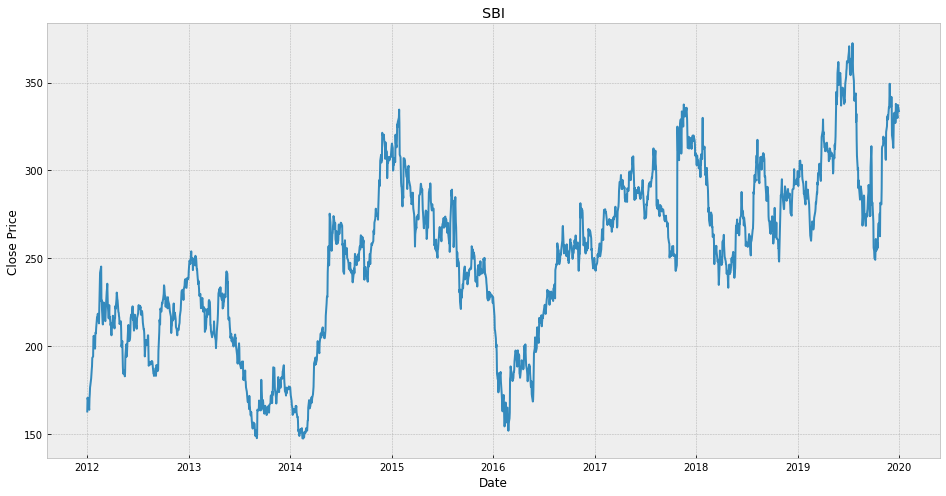

In [ ]:
plt.figure(figsize=(16,8))
plt.title('SBI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=df.filter(['Close'])
df =df.dropna()
dataset = df.values
df.head(4)

,Close
Date,
2012-01-02,162.764999
2012-01-03,170.565002
2012-01-04,169.604996
2012-01-05,169.244995


In [ ]:
f_d = 250
df['Prediction']=df['Close'].shift(-f_d)
df.head(4)

,Close,Prediction
Date,,
2012-01-02,162.764999,249.335007
2012-01-03,170.565002,252.279999
2012-01-04,169.604996,253.910004
2012-01-05,169.244995,249.104996


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-f_d]
print(X)

[[162.76499939]
 [170.56500244]
 [169.60499573]
 ...
 [289.20001221]
 [289.5       ]
 [292.75      ]]


In [ ]:
y = np.array(df['Prediction'])[:-f_d]
print(y)

[249.33500671 252.27999878 253.91000366 ... 337.25       334.3999939
 333.75      ]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =scaler.fit_transform(dataset)
scaled_data

array([[0.06845449],
       [0.10311501],
       [0.09884907],
       ...,
       [0.84380557],
       [0.83114113],
       [0.82825278]])

In [ ]:
training_data_len =math.ceil(len(dataset)*.8)
training_data_len


1572

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train =[]
y_train =[]
for i in range(250,len(train_data)):
  x_train.append(train_data[i-250:i,0])
  y_train.append(train_data[i,0])
  if i<= 251:
    print(x_train)
    print(y_train)
    print()

[array([0.06845449, 0.10311501, 0.09884907, 0.09724936, 0.08849535,
       0.07272043, 0.10175966, 0.11258002, 0.12922148, 0.13442055,
       0.15232847, 0.16459294, 0.17408018, 0.18250086, 0.20407485,
       0.20747424, 0.25204409, 0.25968719, 0.2519552 , 0.22735956,
       0.2612869 , 0.26841895, 0.26617488, 0.27975028, 0.30619001,
       0.30194632, 0.31289991, 0.31567719, 0.31030041, 0.29134822,
       0.32285372, 0.34529419, 0.38959743, 0.4192366 , 0.43496711,
       0.34722717, 0.34967119, 0.3252755 , 0.28850429, 0.33667349,
       0.34391667, 0.33111892, 0.34353893, 0.3121445 , 0.29961342,
       0.2968139 , 0.33451831, 0.37202277, 0.37944366, 0.39157482,
       0.36691252, 0.33518483, 0.30392377, 0.31716585, 0.33738449,
       0.30527906, 0.30801193, 0.28610468, 0.29130374, 0.26912995,
       0.26117577, 0.27672856, 0.2918592 , 0.31058926, 0.3061456 ,
       0.27855048, 0.30110201, 0.3043681 , 0.33502936, 0.32825274,
       0.35171523, 0.36913435, 0.36355761, 0.3534705 , 0.3496

In [ ]:
x_train,y_train =np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1322, 250, 1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import LSTM

In [ ]:
model =Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, batch_size=10,epochs=4)


Epoch 1/4
133/133 [==============================] - 5s 16ms/step - loss: 0.0367
Epoch 2/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0022
Epoch 3/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0018
Epoch 4/4
133/133 [==============================] - 2s 15ms/step - loss: 0.0016


In [ ]:
test_data = scaled_data[training_data_len -250 :,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(250, len(test_data)):
  x_test.append(test_data[i-250:i,0])


In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


2.435956338586395

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


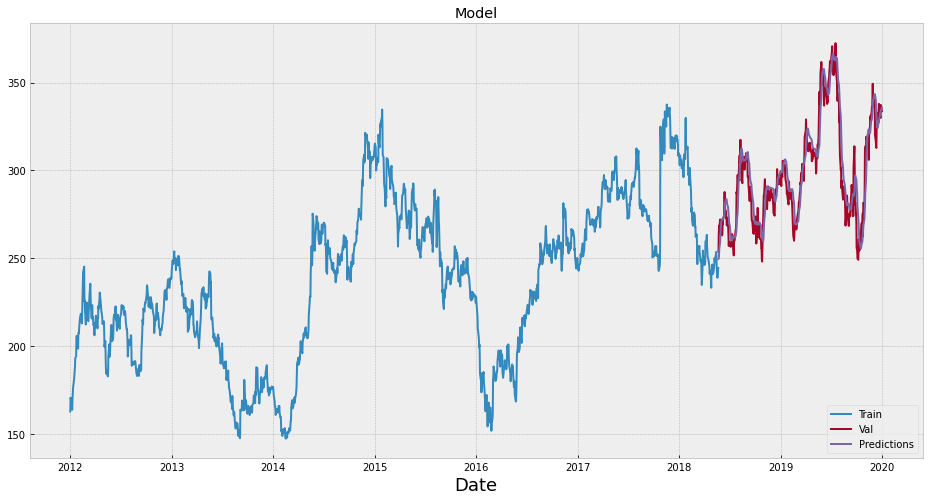

In [ ]:
train = df[:training_data_len]
valid =  df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
valid


,Close,Prediction,Predictions
Date,,,
2018-05-22,253.899994,353.549988,249.633057
2018-05-23,263.200012,352.500000,249.959976
2018-05-24,268.500000,355.450012,252.051666
2018-05-25,266.950012,352.399994,255.522034
2018-05-28,272.049988,336.899994,259.238037
...,...,...,...
2019-12-24,331.450012,NaN,332.222351
2019-12-26,329.850006,NaN,333.305786
2019-12-27,337.250000,NaN,333.831635


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)


In [ ]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr= LinearRegression().fit(x_train,y_train)


In [ ]:
x_train.shape


(1200, 1)

In [ ]:
x_f = df.drop(['Prediction'],1)[:-f_d]
x_f=x_f.tail(f_d)
x_f=np.array(x_f)
x_f


array([[313.29998779],
       [314.        ],
       [312.25      ],
       [318.8999939 ],
       [319.79998779],
       [317.5       ],
       [316.75      ],
       [319.8500061 ],
       [317.1499939 ],
       [314.8500061 ],
       [308.3999939 ],
       [309.8999939 ],
       [307.1000061 ],
       [303.25      ],
       [302.8500061 ],
       [308.5       ],
       [306.3500061 ],
       [305.79998779],
       [304.29998779],
       [301.1000061 ],
       [302.20001221],
       [302.25      ],
       [302.6000061 ],
       [296.1499939 ],
       [307.1000061 ],
       [303.25      ],
       [309.25      ],
       [306.5       ],
       [318.1000061 ],
       [329.8999939 ],
       [313.1499939 ],
       [312.1000061 ],
       [313.54998779],
       [313.25      ],
       [306.04998779],
       [297.3500061 ],
       [298.04998779],
       [291.75      ],
       [292.79998779],
       [301.3999939 ],
       [296.3999939 ],
       [288.75      ],
       [276.20001221],
       [278

In [ ]:
tree_p =tree.predict(x_f)
print(tree_p)
print()
lr_p=lr.predict(x_f)
print(lr_p)


[300.70001221 251.79999542 291.8999939  281.25       294.1499939
 227.30000305 294.79998779 295.42500305 299.6000061  293.8999939
 287.04998779 297.6499939  270.41666158 296.67498779 244.44999695
 287.04998779 293.7250061  292.875      301.6499939  303.1499939
 297.3999939  294.95001221 183.3500061  290.25       270.41666158
 296.67498779 295.1000061  293.7250061  280.6000061  287.45001221
 182.94999695 284.3999939  283.95001221 300.70001221 289.04998779
 304.45001221 286.         251.6000061  333.75       243.1000061
 268.45001221 258.8500061  262.8999939  267.70001221 273.3500061
 299.1000061  305.09999084 308.6499939  314.44999695 269.04998779
 272.95001221 243.52500153 278.1000061  272.125      281.20001221
 287.3500061  286.8999939  259.21666463 291.8999939  298.3999939
 298.95001221 309.3999939  303.79998779 298.04998779 319.3500061
 303.5        325.5        249.44999695 322.75       320.55000305
 320.5        321.79998779 317.04998779 258.8999939  314.75
 312.1000061  223.     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


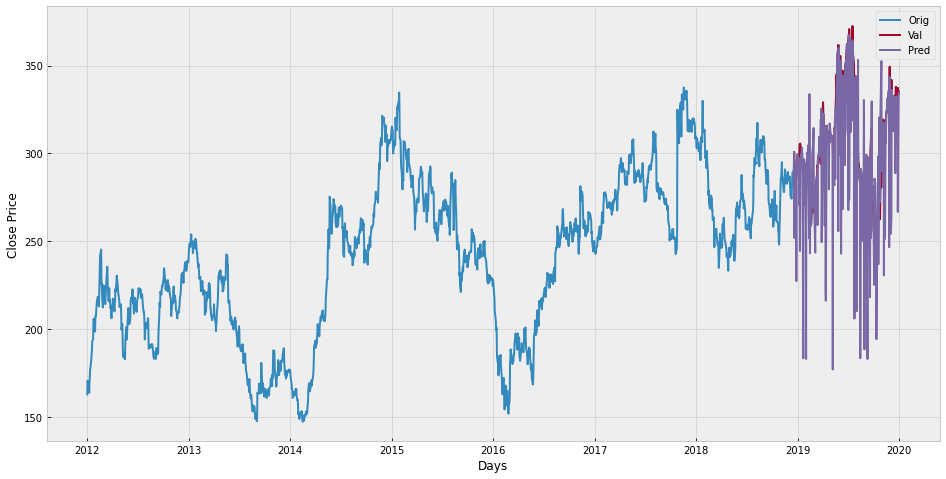

In [ ]:
pr =tree_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()


In [ ]:
valid

,Close,Prediction,Predictions
Date,,,
2018-12-19,300.700012,NaN,300.700012
2018-12-20,294.049988,NaN,251.799995
2018-12-21,291.899994,NaN,291.899994
2018-12-24,293.049988,NaN,281.250000
2018-12-26,294.149994,NaN,294.149994
...,...,...,...
2019-12-24,331.450012,NaN,331.450012
2019-12-26,329.850006,NaN,329.850006
2019-12-27,337.250000,NaN,266.699997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


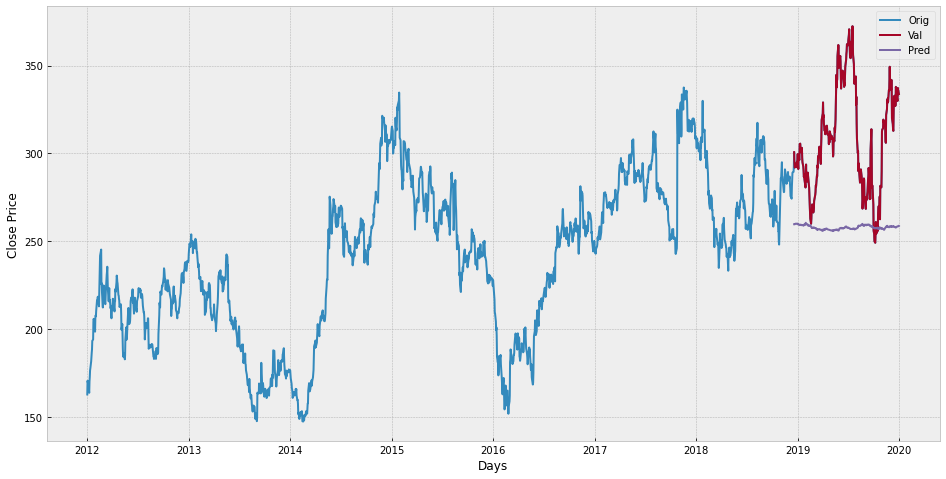

In [ ]:
pr =lr_p
valid = df[X.shape[0]:]
valid['Predictions']=pr
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()
